In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [47]:
from google.colab import files
files.upload()

Saving diabetes_.csv to diabetes_.csv


{'diabetes_.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,4

In [49]:
#1. Load the Dataset:
#Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/diabetes_.csv")

In [50]:
#Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [59]:
#2Handle Missing Data
df.fillna(df.mean(numeric_only=True), inplace=True)
#Handle any missing values appropriately, either by dropping or imputing them based on the data
for col in df.select_dtypes(include='object'):
  df[col].fillna(df[col].mode()[0], inplace=True)

In [52]:
#3. Feature Engineering:
#Separate the feature matrix (X) and target variable (y).
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
#Perform a train - test split from scratch using a 70% − 30% ratio
split_ratio =0.7
split_index = int(len(x) * split_ratio)
X_train = x[:split_index]
X_test= x[split_index:]
Y_train = y[:split_index]
Y_test = y[split_index:]

In [53]:
#Implement KNN:
#Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
#Compute distances using Euclidean distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
#Write functions for:
#– Predicting the class for a single query.
def predict_single(X_train, Y_train, query, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, Y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)

#– Predicting classes for all test samples.
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        predictions.append(predict_single(X_train, y_train, x, k))
    return np.array(predictions)
#Evaluate the performance using accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
k = 5
y_pred = predict_all(X_train, Y_train, X_test, k)
print("Accuracy:", accuracy(Y_test, y_pred))

Accuracy: 0.7272727272727273


In [54]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
X_scaled = standard_scaler(x)
X_train_s = X_scaled[:split_index]
X_test_s = X_scaled[split_index:]

In [55]:
y_pred_scaled = predict_all(X_train_s, Y_train, X_test_s, k)
print("Scaled Accuracy:", accuracy(Y_test, y_pred_scaled))

Scaled Accuracy: 0.7575757575757576


In [58]:
import time

k_values = range(1, 16)
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []
for k in k_values:
    start = time.time()
    y_pred = predict_all(X_train, Y_train, X_test, k)
    time_original.append(time.time() - start)
    acc_original.append(accuracy(Y_test, y_pred))

    # Scaled data
    start = time.time()
    y_pred_s = predict_all(X_train_s, Y_train, X_test_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(accuracy(Y_test, y_pred_s))


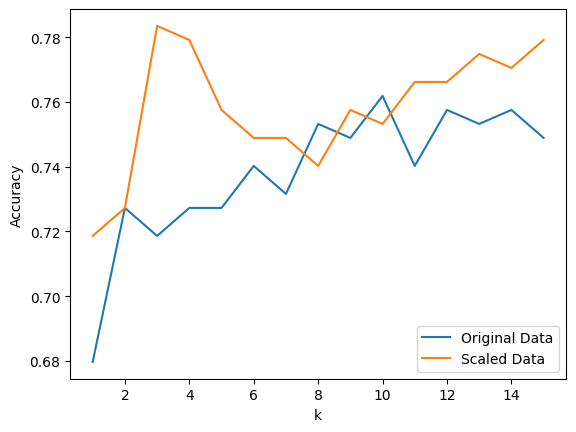

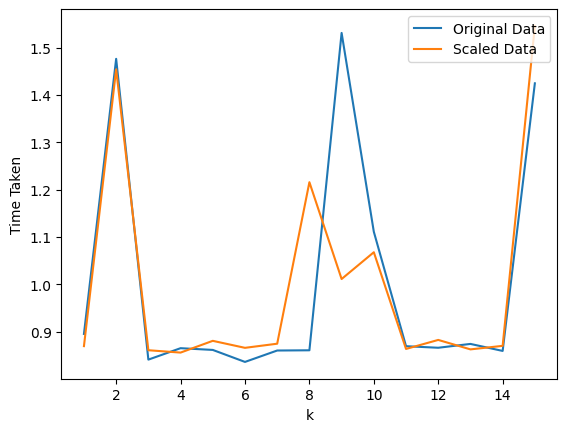

In [57]:
#k vs accuracy
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#k vs time
plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time Taken")
plt.legend()
plt.show()